In [1]:
# import necessary libraries
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# check the number of rows and columsn
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


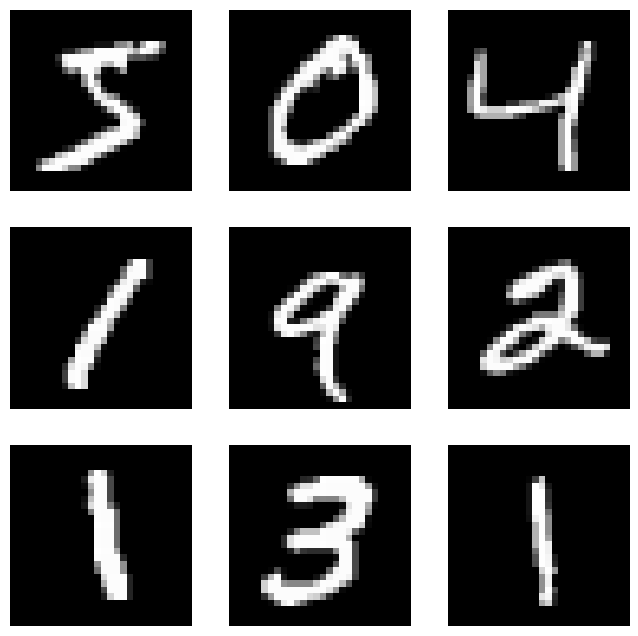

In [4]:
# Plot the first 9 images from the training dataset
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3,3, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.axis("off")

In [5]:
# check the first 9 labels from training data
for i in range(9):
    print(y_train[i])

5
0
4
1
9
2
1
3
1


In [6]:
# Reshape data to fit the model by adding the channel dimension
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# There are 2 other ways which are advance or latest. Which can be used once familiar

# x_train = x_train.reshape(-1, 28, 28, 1)
# x_test = x_test.reshape(-1, 28, 28, 1)

# x_train = x_train[..., tf.newaxis]
# x_test = x_test[..., tf.newaxis]

In [7]:
# Convert data to float32 and normalize to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [8]:
# One-hot encode target labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
# after encoding
for i in range(9):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [10]:
# Build CNN model
model = Sequential()

model.add(Input(shape=(28, 28, 1)))

# First convolutional layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second convolutional layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten the data for fully connected layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [11]:
# Compile and train the model
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [12]:
# check the model summayr which contains number of parameters
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# train the model with train data and validate
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    verbose=1,                    
                    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 80ms/step - accuracy: 0.7399 - loss: 0.7954 - val_accuracy: 0.9732 - val_loss: 0.0913
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9546 - loss: 0.1510 - val_accuracy: 0.9820 - val_loss: 0.0602
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 77ms/step - accuracy: 0.9686 - loss: 0.1056 - val_accuracy: 0.9841 - val_loss: 0.0537
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 29s 77ms/step - accuracy: 0.9709 - loss: 0.0923 - val_accuracy: 0.9872 - val_loss: 0.0444
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 29s 78ms/step - accuracy: 0.9768 - loss: 0.0761 - val_accuracy: 0.9875 - val_loss: 0.0412
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.9776 - loss: 0.0677 - val_accuracy: 0.9884 - val_loss: 0.0406
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.9797 - loss: 0.0656 - val_accuracy: 0.9892 - val_loss: 0.0370
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 29s 77ms/step - accuracy: 0.9830 - loss: 0.0548 - 

In [14]:
# model evaluation after training
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9890 - loss: 0.0319
Test loss: 0.026286162436008453
Test accuracy: 0.991100013256073


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


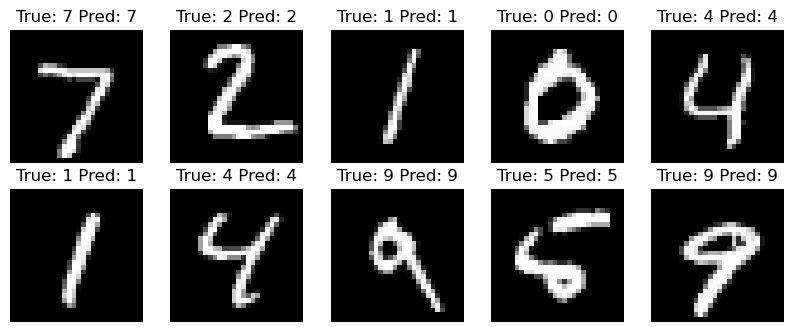

In [15]:
# Predict the first 10 images in the test set
predictions = model.predict(x_test[:10])

# Plot the first 10 test images, their predicted labels, and the true labels
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i].argmax()} Pred: {predictions[i].argmax()}")
    plt.axis('off')
plt.show()

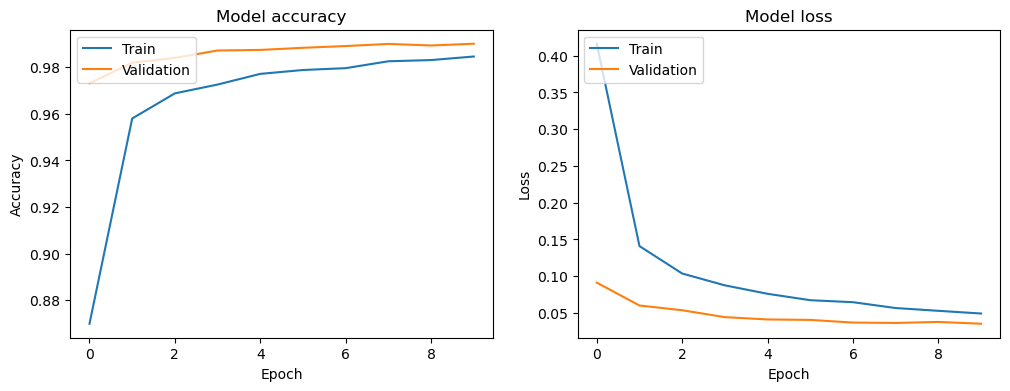

In [16]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()